# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

                                                CONCLUSIONS
1. *Latitude vs Temperature*. There is a clear correlation in both plots (scatter & linear), with more than 70% of confidence we can declare when cities approach the equator (0 degrees Latitude) the level of temperature increase.
2. *Latitude vs Humidity*. There is not clear correlation in both plots (scatter & linear), between these two variables. Even though, is interesting to see that there are more significant results scattered in the northern hemisphere than the southern, with 80 to 100% of humidity.
3. *Latitude vs Cloudiness*. There is not clear correlation in both plots (scatter & linear), between these two variables. As same as Humidity, looks like there is a large cluster of observations in the northern hemisphere.
4. *Latitude vs Wind Speed*. There is not clear correlation in both plots (scatter & linear), which is the parameter that has less correlation between them.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Chosing IMPERIAL due to the exercise is in Fahrenheit
units = "imperial"

# Print the URL for the Open Weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=965010596c72e3ffae1f9da4fdaa87ed&units=imperial&q='

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Initial print as asked in the result.

print('''Beginning Data Retrieval     
-----------------------------''')

# Declare variables would be used in the loop.

record_num = 0                   # The result has the structure "Processing Record *1* of Set 1". Change each iteration.
record_set = 1                   # The result has the structure "Processing Record 1 of Set *1*". Change each set of 50.
city_result = []                 # Variabes would be concatenate in a list to make the Data Frame (lat/tem/hum/cloud/wind)  

# Loop for save the iteration of each response.
# Here is an example of how data looks in API: http://api.openweathermap.org/data/2.5/weather?appid=965010596c72e3ffae1f9da4fdaa87ed&units=imperial&q=ostrovnoy

for city in cities:
    city_url = query_url + city                   # Add to the URL the city save in cities, taken randomly for step before.
    weather_response = requests.get(city_url)    # Declare a JSON to read the API
    weather_json = weather_response.json()

    try:                         # Using try to jump error, in case the city do not contain the paramters.
        record_num += 1          # Each iteration would add a number. Ex. Record 1, 2 , 3,...
        latitude = weather_json["coord"]["lat"]        # It reads JSON and teakes the parameter "lat" which is inside the main "coord"
        longitude = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        
        # Use APPEND to concatenate all the info got it above
        city_result.append({"City":city, "Lat": latitude, "Lng" : longitude, "Max Temp": max_temp, 
                            "Humidity": humidity, "Cloudiness":  cloudiness, "Wind Speed": wind_speed, 
                            "Country": country, "Date": date})
        
        print(f"Processing Record {record_num} of Set {record_set} | {city}")
        
    except KeyError:                              # Use excecpt in case the coordinated do not find a city near.
        print("City not found.Skipping...")
        
    # Declare limits to jump to the next set of information. As example, maximum iteration is 50 by set.
    if record_num == 50:
        record_set += 1
        record_num = 0
        time.sleep(5)         # Giving time space between sets to avoid errors.
            
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grindavik
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | aras
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | busselton
City not found.Skipping...
Processing Record 9 of Set 1 | namatanai
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | tooele
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | malatya
Processing Record 14 of Set 1 | san quintin
Processing Record 15 of Set 1 | galveston
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | hollola
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | acarau
Processing Record 20 of Set 1 | alta floresta
Processing Record 21 of Set 1 | acton vale
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | ushuaia
Proc

Processing Record 5 of Set 5 | fayaoue
Processing Record 6 of Set 5 | port blair
Processing Record 7 of Set 5 | victoria
Processing Record 8 of Set 5 | klaksvik
Processing Record 9 of Set 5 | alofi
Processing Record 10 of Set 5 | longyearbyen
Processing Record 11 of Set 5 | nanortalik
Processing Record 12 of Set 5 | karaton
Processing Record 13 of Set 5 | kostolac
City not found.Skipping...
Processing Record 15 of Set 5 | ostrovnoy
Processing Record 16 of Set 5 | tagusao
Processing Record 17 of Set 5 | kavieng
Processing Record 18 of Set 5 | college
Processing Record 19 of Set 5 | kushima
Processing Record 20 of Set 5 | leninkent
Processing Record 21 of Set 5 | bethel
Processing Record 22 of Set 5 | honiara
Processing Record 23 of Set 5 | san luis
Processing Record 24 of Set 5 | hermanus
Processing Record 25 of Set 5 | ellisras
Processing Record 26 of Set 5 | marsa matruh
Processing Record 27 of Set 5 | brokopondo
Processing Record 28 of Set 5 | weligama
Processing Record 29 of Set 5 |

City not found.Skipping...
Processing Record 14 of Set 9 | walvis bay
Processing Record 15 of Set 9 | krasnoselkup
Processing Record 16 of Set 9 | kumluca
Processing Record 17 of Set 9 | strezhevoy
Processing Record 18 of Set 9 | roebourne
Processing Record 19 of Set 9 | labelle
Processing Record 20 of Set 9 | severo-yeniseyskiy
Processing Record 21 of Set 9 | ojinaga
Processing Record 22 of Set 9 | abalak
Processing Record 23 of Set 9 | portgordon
Processing Record 24 of Set 9 | altamira
Processing Record 25 of Set 9 | belyy yar
Processing Record 26 of Set 9 | naryan-mar
City not found.Skipping...
Processing Record 28 of Set 9 | sabla
Processing Record 29 of Set 9 | omboue
Processing Record 30 of Set 9 | gemena
Processing Record 31 of Set 9 | tuatapere
Processing Record 32 of Set 9 | taikang
Processing Record 33 of Set 9 | tual
Processing Record 34 of Set 9 | bambanglipuro
Processing Record 35 of Set 9 | larsnes
Processing Record 36 of Set 9 | verkhnevilyuysk
Processing Record 37 of S

Processing Record 13 of Set 13 | miami
Processing Record 14 of Set 13 | kenora
Processing Record 15 of Set 13 | moose factory
Processing Record 16 of Set 13 | praia
Processing Record 17 of Set 13 | dillon
Processing Record 18 of Set 13 | xiaoweizhai
Processing Record 19 of Set 13 | midland
Processing Record 20 of Set 13 | prince rupert
-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a Data Frame - in this case is not necessary to clean, in case use dropna()

weather_result = pd.DataFrame(city_result)
weather_result

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grindavik,63.8424,-22.4338,46.40,71,90,10.36,IS,1619535558
1,port alfred,-33.5906,26.8910,69.64,66,0,18.70,ZA,1619535559
2,aras,42.5617,-2.3560,57.99,82,75,5.75,ES,1619535559
3,georgetown,5.4112,100.3354,82.40,83,40,2.30,MY,1619535559
4,rikitea,-23.1203,-134.9692,76.17,75,42,8.34,PF,1619535289
...,...,...,...,...,...,...,...,...,...
565,praia,14.9215,-23.5087,78.80,57,75,19.57,CV,1619535825
566,dillon,34.4166,-79.3712,73.99,46,1,5.75,US,1619535826
567,xiaoweizhai,26.1903,107.5125,58.75,94,38,1.90,CN,1619535592
568,midland,31.9974,-102.0779,78.01,50,1,11.50,US,1619535615


In [5]:
# Save dataframe in output_data file.

weather_result.to_csv("output_data/weather_city_data.csv", index=False, header=True)


In [6]:
# Use fucntion .describe to show the metrics for the Data Frame

weather_result.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.663491,17.064677,62.134965,68.326316,55.629825,7.675544,1.619536e+09
std,32.235383,92.677773,20.655140,22.100796,37.833343,4.838828,1.061955e+02
min,-54.800000,-175.200000,-2.560000,1.000000,0.000000,0.490000,1.619535e+09
25%,-3.691675,-67.378850,46.400000,57.000000,20.000000,3.850000,1.619536e+09
50%,25.533100,20.983450,65.505000,72.000000,75.000000,6.655000,1.619536e+09
75%,46.596000,102.433650,78.707500,86.000000,90.000000,10.360000,1.619536e+09
max,78.218600,179.316700,108.720000,100.000000,100.000000,26.460000,1.619536e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_result.loc[weather_result["Humidity"] <= 100]

clean_city_data

# To check humidity parameter and secure values & formula
# humidity = weather_result["Humidity"].tolist()
# humidity.sort(reverse=True)
# humidity


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grindavik,63.8424,-22.4338,46.40,71,90,10.36,IS,1619535558
1,port alfred,-33.5906,26.8910,69.64,66,0,18.70,ZA,1619535559
2,aras,42.5617,-2.3560,57.99,82,75,5.75,ES,1619535559
3,georgetown,5.4112,100.3354,82.40,83,40,2.30,MY,1619535559
4,rikitea,-23.1203,-134.9692,76.17,75,42,8.34,PF,1619535289
...,...,...,...,...,...,...,...,...,...
565,praia,14.9215,-23.5087,78.80,57,75,19.57,CV,1619535825
566,dillon,34.4166,-79.3712,73.99,46,1,5.75,US,1619535826
567,xiaoweizhai,26.1903,107.5125,58.75,94,38,1.90,CN,1619535592
568,midland,31.9974,-102.0779,78.01,50,1,11.50,US,1619535615


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

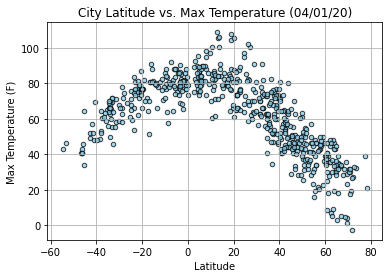

In [8]:
# Create a scatter plot (alpha = size / edgecolor = border / color = circle color) 
clean_city_data.plot.scatter(x="Lat", y="Max Temp", color="skyblue", alpha=0.75, edgecolors = "black")

# Additional Properties
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.savefig("Figures/fig1_SP_Lat_vs_Tem.png")
plt.show()


## Latitude vs. Humidity Plot

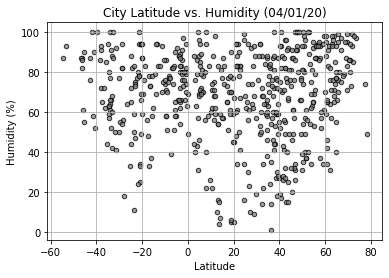

In [9]:
# Create a scatter plot
clean_city_data.plot.scatter(x="Lat", y="Humidity", color="grey", alpha=0.75, edgecolors = "black")

# Additional Properties
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid ()
plt.savefig("Figures/fig2_SP_Lat_vs_Hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

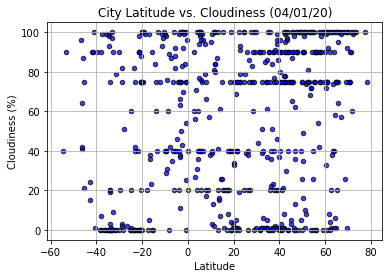

In [10]:
# Create a scatter plot
clean_city_data.plot.scatter(x="Lat", y="Cloudiness", color="blue", alpha=0.75, edgecolors = "black")

# Additional Properties
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid ()
plt.savefig("Figures/fig3_SP_Lat_vs_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

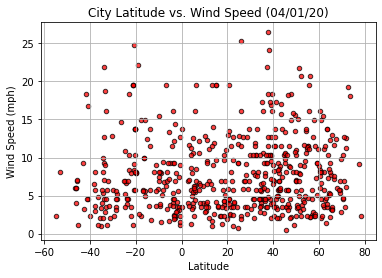

In [11]:
# Create a scatter plot
clean_city_data.plot.scatter(x="Lat", y="Wind Speed", color="red", alpha=0.75, edgecolors = "black")

# Additional Properties
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid ()
plt.savefig("Figures/fig4_SP_Lat_vs_Wind.png")
plt.show()

## Linear Regression

In [21]:
# Using the fucntion .loc to filter the values < or > than 0. Important, use the original DF, otherwise not possible to do it.

north_hemisphere = weather_result.loc[weather_result["Lat"] > 0]
south_hemisphere = weather_result.loc[weather_result["Lat"] < 0]

south_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,port alfred,-33.5906,26.8910,69.64,66,0,18.70,ZA,1619535559
4,rikitea,-23.1203,-134.9692,76.17,75,42,8.34,PF,1619535289
6,busselton,-33.6500,115.3333,60.01,91,1,2.89,AU,1619535560
7,namatanai,-3.6667,152.4333,79.61,80,100,5.32,PG,1619535560
10,mount isa,-20.7333,139.5000,75.20,25,0,5.75,AU,1619535561


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation equals to -0.86


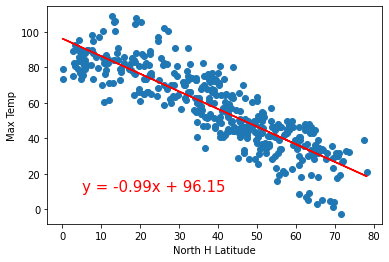

<Figure size 432x288 with 0 Axes>

In [13]:
# Calculate the correlation coefficient and linear regression model 

x_axis = north_hemisphere["Lat"]
y_axis = north_hemisphere["Max Temp"]
corr=round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation equals to {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel("North H Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("Figures/fig5_RP_NHLat_vs_MaxT.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation equals to 0.77


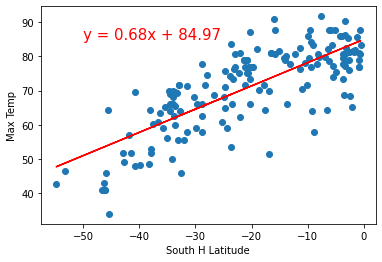

<Figure size 432x288 with 0 Axes>

In [14]:
# Calculate the correlation coefficient and linear regression model 

x_axis = south_hemisphere["Lat"]
y_axis = south_hemisphere["Max Temp"]
corr=round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation equals to {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel("South H Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("Figures/fig6_RP_SHLat_vs_MaxT")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation equals to 0.19


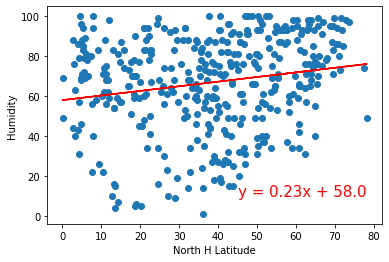

<Figure size 432x288 with 0 Axes>

In [15]:
# Calculate the correlation coefficient and linear regression model 

x_axis = north_hemisphere["Lat"]
y_axis = north_hemisphere["Humidity"]
corr=round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation equals to {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("North H Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig("Figures/fig7_RP_NHLat_vs_Hum.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation equals to 0.01


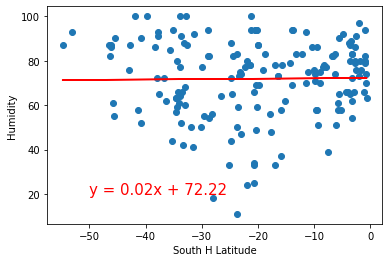

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate the correlation coefficient and linear regression model 

x_axis = south_hemisphere["Lat"]
y_axis = south_hemisphere["Humidity"]
corr=round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation equals to {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("South H Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig("Figures/fig8_RP_SHLat_vs_Hum.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation equals to 0.19


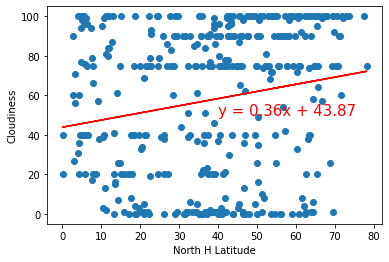

<Figure size 432x288 with 0 Axes>

In [17]:
x_axis = north_hemisphere["Lat"]
y_axis = north_hemisphere["Cloudiness"]
corr=round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation equals to {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.xlabel("North H Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.savefig("Figures/fig9_RP_NHLat_vs_Cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation equals to 0.23


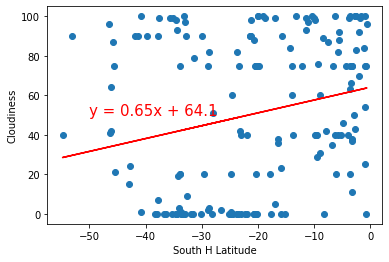

<Figure size 432x288 with 0 Axes>

In [18]:
x_axis = south_hemisphere["Lat"]
y_axis = south_hemisphere["Cloudiness"]
corr=round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation equals to {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel("South H Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.savefig("Figures/fig10_RP_SHLat_vs_Cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation equals to 0.07


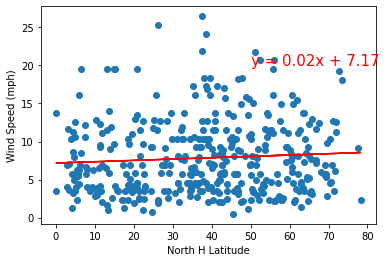

<Figure size 432x288 with 0 Axes>

In [19]:
x_axis = north_hemisphere["Lat"]
y_axis = north_hemisphere["Wind Speed"]
corr=round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation equals to {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel("North H Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

plt.savefig("Figures/fig11_RP_NHLat_vs_Wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation equals to 0.01


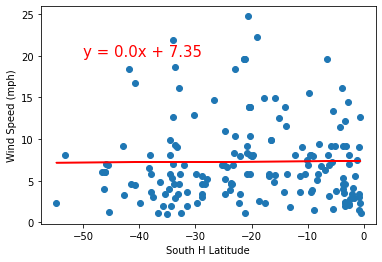

<Figure size 432x288 with 0 Axes>

In [20]:
x_axis = south_hemisphere["Lat"]
y_axis = south_hemisphere["Wind Speed"]
corr=round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation equals to {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("South H Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

plt.savefig("Figures/fig12_RP_SHLat_vs_Wind.png")